# UBER ANALYSIS
   >**~ AKSHAT SAXENA**

## Data Description
#### Content
- **Geography:** USA, Sri Lanka and Pakistan
​
- **Time period:** January - December 2016
​
- **Unit of analysis:** Drives
​
- **Total Drives:** 1,155
​
- **Total Miles:** 12,204
 > **The dataset contains Start Date, End Date, Start Location, End Location, Miles Driven and Purpose of drive (Business, Personal, Meals, Errands, Meetings, Customer Support etc.)**

### Importing Libraries:

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time, datetime
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

### Importing Dataset

In [82]:
df = pd.read_csv(r"E:\2016uber.csv")
df.head(3)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [83]:
df.columns = df.columns.str.replace("*", "")
#removing * symbol from columns
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies


In [84]:
df.tail(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


> Here, we can see that last rows contains NaN values.

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


>Above info is showing us that the Miles is of float Dtype while others are of Object Dtype.

>We can also see that there are in total 503(1156-653) NULL values in "Purpose".

>There are in total 1156 rows and 7 columns present in the Dataset.

In [86]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [87]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

>These null values can cause problems to predictions.
>So let us visualize the null values for each attribute.

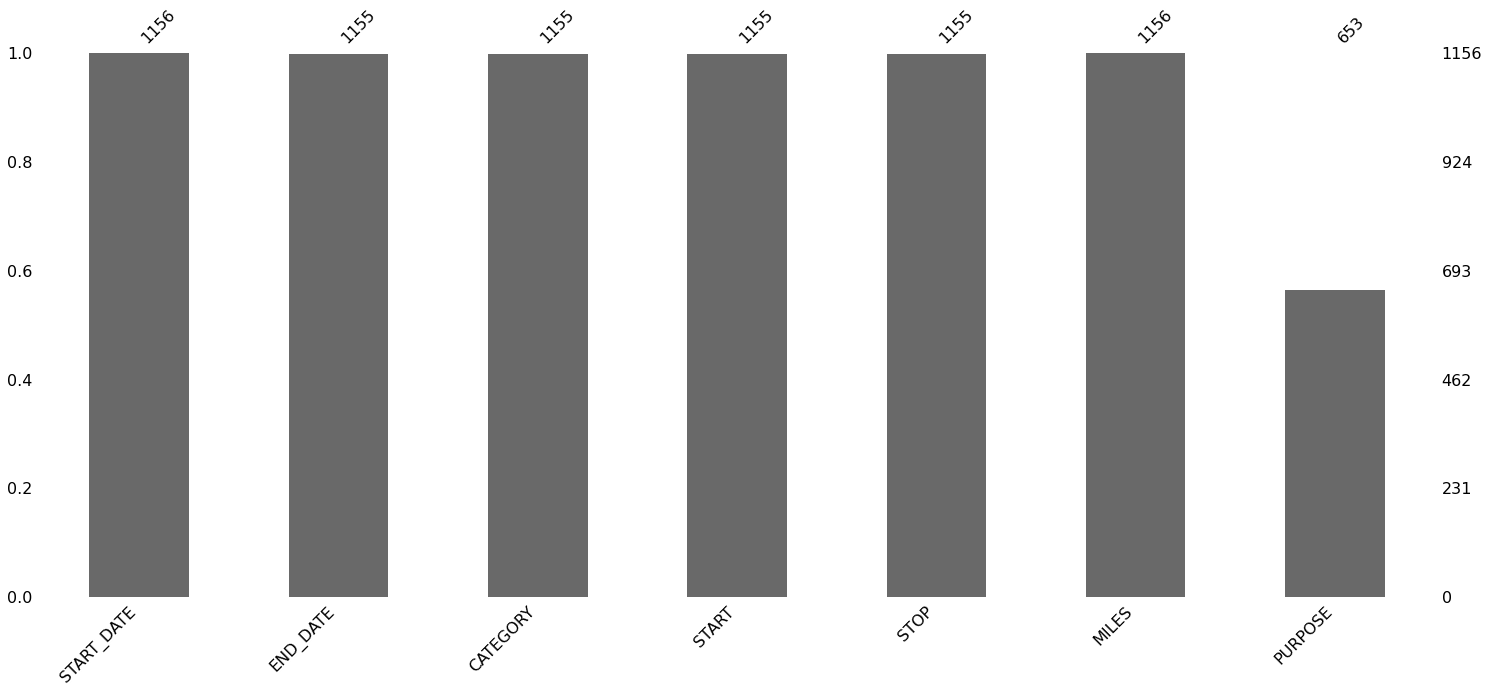

In [88]:
import missingno as msno

msno.bar(df)
plt.show()

In [89]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

>This shows that there exist only 1 row (row no: 1155) which have NaN values for the attributes End Date, Start, Stop, and Category. So let us drop that row.

In [90]:
df.drop(index = 1155, axis = 0, inplace = True)

In [91]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [92]:
df["PURPOSE"].isnull().sum()/len(df)

0.43463203463203465

> This shows that 43% of null values are present in the dataset in PURPOSE COLUMN.

In [93]:
df["PURPOSE"].fillna(method='ffill', inplace = True)

In [94]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

### Analysis Part

In [95]:
df['START_DATE']= pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']= pd.to_datetime(df['END_DATE'],errors='coerce')
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


col_0,Count of travels as per category
CATEGORY,
Business,1078
Personal,77


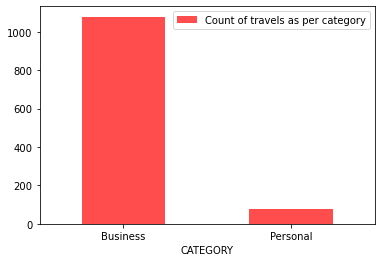

In [96]:
Category =pd.crosstab(index=df['CATEGORY'],columns='Count of travels as per category')
Category.plot(kind='bar',color='r',alpha=0.7)
plt.xticks(rotation=0)
plt.legend() #describe the elements of graph, In this graph it shows the count of travels.
Category


### Let us find the highest START point

In [98]:
Start_point = df.START.value_counts()
Start_point
print(Start_point[Start_point > 10])

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
R?walpindi           11
Kenner               11
Kissimmee            11
Name: START, dtype: int64


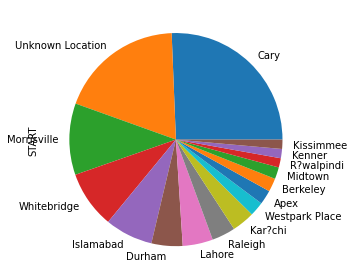

In [99]:
Start_point[Start_point > 10].plot(kind = "pie")
plt.tight_layout()
plt.show()

#### Above pie chart can say that, Cary, Unknown Location, Morrisville , and Whitebridge are the highest starting point.

### Let us find the lowest START point 

In [100]:
Start_point = df.START.value_counts()
Start_point
Start_point[Start_point <=  10]

Emeryville        10
New Orleans       10
Downtown           9
Edgehill Farms     8
San Francisco      8
                  ..
Summerwinds        1
Santa Clara        1
College Avenue     1
Midtown East       1
St Thomas          1
Name: START, Length: 161, dtype: int64

#### Above data shows that there are many lowest START point. So I will ignore making a pie chart of it.

### Let us find the highest STOP point

In [101]:
Stop_point = df.STOP.value_counts()
Stop_point
Stop_point[Stop_point >=  10]

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Lahore               36
Durham               36
Raleigh              29
Kar?chi              26
Apex                 17
Westpark Place       16
Berkeley             16
R?walpindi           13
Kissimmee            12
Midtown              11
Edgehill Farms       10
Kenner               10
New Orleans          10
Name: STOP, dtype: int64

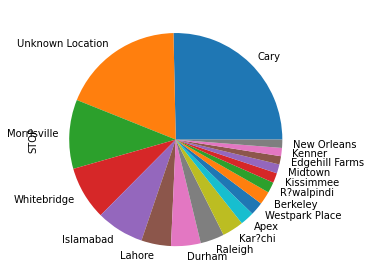

In [102]:
Stop_point[Stop_point >= 10].plot(kind = "pie")
plt.tight_layout()
plt.show()

#### The places Cary , Unknown Location, Morrisville , Whitebridge, and Islamabad are highest stop points.

### Let us find the lowest STOP point

In [103]:
Stop_point = df.STOP.value_counts()
Stop_point
Stop_point[Stop_point <=  10]

Edgehill Farms               10
Kenner                       10
New Orleans                  10
Central                       9
Emeryville                    9
                             ..
Arlington Park at Amberly     1
Stonewater                    1
Winston Salem                 1
Arabi                         1
Queens County                 1
Name: STOP, Length: 173, dtype: int64

#### Above data shows that there are many lowest STOP point. So I will ignore making a pie chart of it.

### Let us see the purpose of most cab rides

In [104]:
print(df.PURPOSE.value_counts())

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64


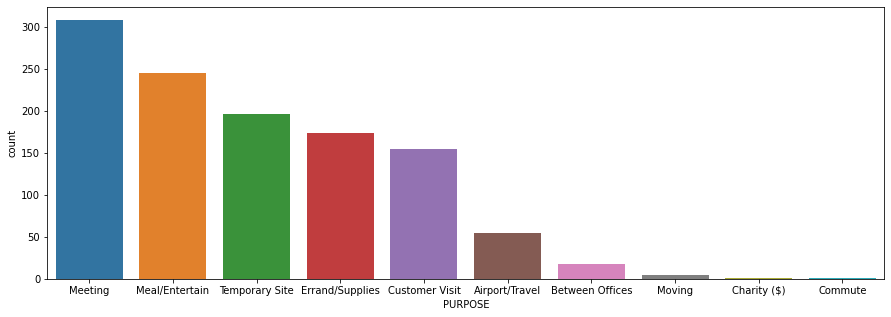

In [105]:
plt.figure(figsize=(15,5))
sns.countplot(df['PURPOSE'], order=df['PURPOSE'].value_counts().index)
plt.show()

In [106]:
df['MINUTES'] = df.END_DATE - df.START_DATE
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00


In [107]:
df['MINUTES'] = df['MINUTES'].dt.total_seconds() /60
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


### Grouping Purpose by Miles to see if we can get any pattern

In [108]:
pd.DataFrame({'MEAN': df.groupby(['PURPOSE'])['MILES'].mean().round(1), 
              'MIN' : df.groupby(['PURPOSE'])['MILES'].min(), 
              'MAX' : df.groupby(["PURPOSE"])['MILES'].max()}).reset_index()

,PURPOSE,MEAN,MIN,MAX
0,Airport/Travel,15.0,0.9,156.9
1,Between Offices,10.9,1.9,39.2
2,Charity ($),15.1,15.1,15.1
3,Commute,180.2,180.2,180.2
4,Customer Visit,16.1,0.6,310.3
5,Errand/Supplies,5.9,0.5,195.3
6,Meal/Entertain,5.8,0.6,36.5
7,Meeting,12.7,0.7,201.0
8,Moving,4.6,3.3,6.1
9,Temporary Site,11.0,0.7,195.6


###  BOX Plot for better Visualization
> BOX plot of MILES and MINUTES split by PURPOSE

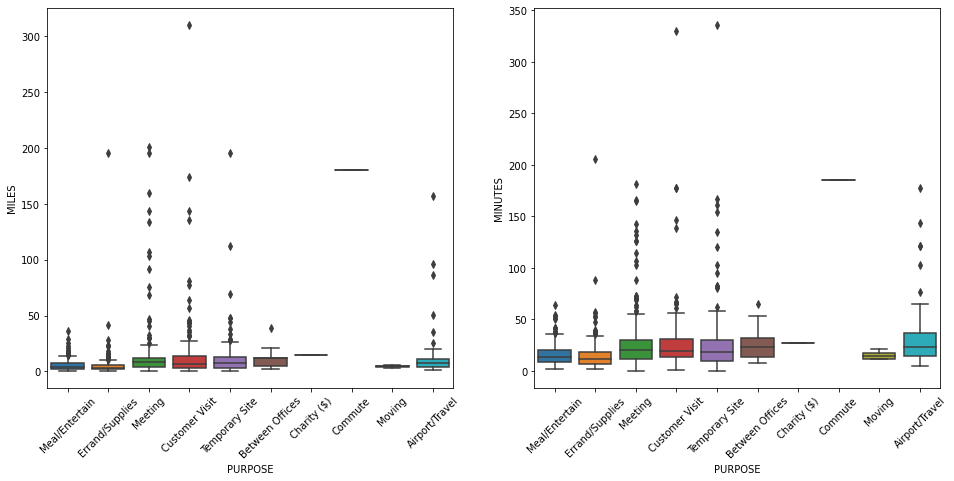

In [109]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES)
plt.xticks(rotation=45);

### Boxplots of MILES and MINUTES based on PURPOSE without outliers

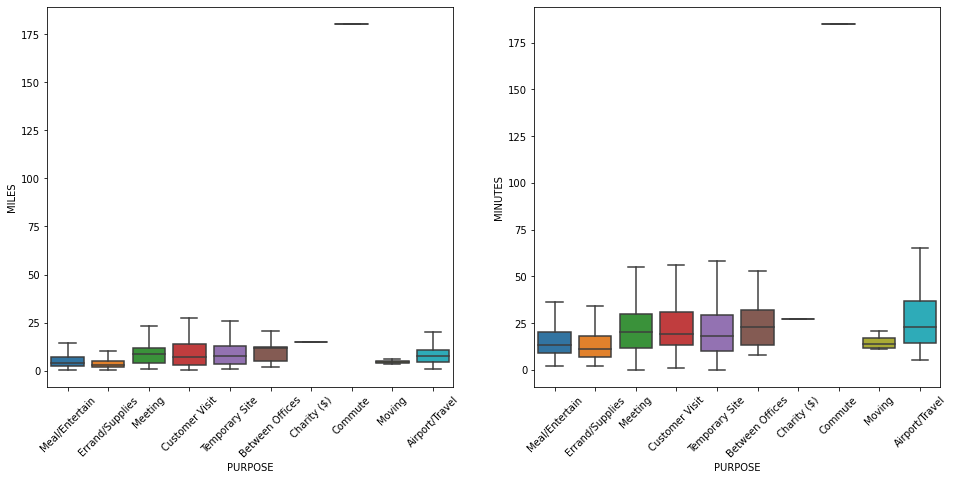

In [110]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES,showfliers=False)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES,showfliers=False)
plt.xticks(rotation=45);

### Checking how many are the ROUND TRIPS i.e. start and stop points are same

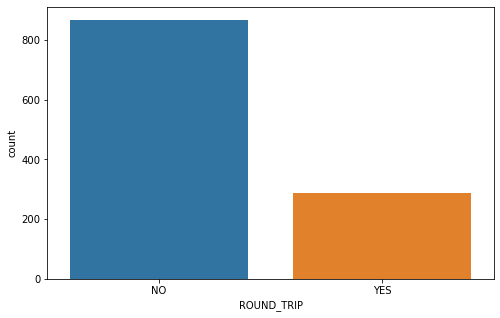

NO     867
YES    288
Name: ROUND_TRIP, dtype: int64

In [111]:
plt.figure(figsize=(8,5))
def round(x):
    if x['START'] == x['STOP']:
        return 'YES'
    else:
        return 'NO'
    
df['ROUND_TRIP'] = df.apply(round, axis=1)

sns.countplot(df['ROUND_TRIP'], order=df['ROUND_TRIP'].value_counts().index)
plt.show()
df['ROUND_TRIP'].value_counts()

**As expected there are more one-way trips than round trips**

### Is the distance proportional to the duration?


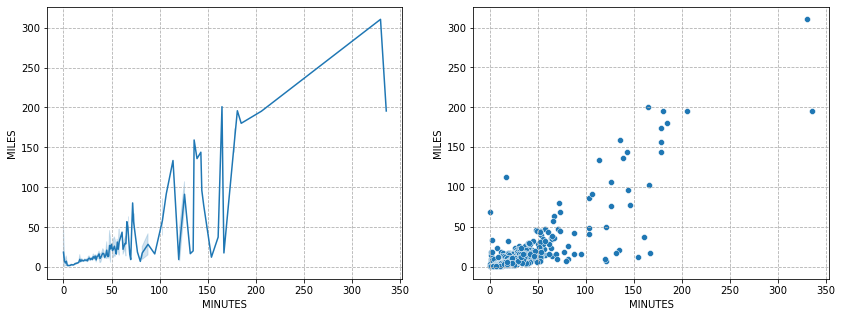

In [112]:
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
sns.lineplot(data=df, x=df.MINUTES, y=df.MILES)
plt.grid(True, linestyle = "--")
plt.subplot(1,2,2)
sns.scatterplot(data=df, x=df.MINUTES, y=df.MILES)
plt.grid(True, linestyle = "--")

#### We can see that our conventional logic, that distance is proportional to time, is challenged as some cab rides took more time for less distance.

### Entering Month Name and evaluating Frequency of Trip in each Month

In [113]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month

In [114]:
dic = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep',
      10: 'Oct', 11: 'Nov', 12: 'Dec' }

df['MONTH'] = df['MONTH'].map(dic)

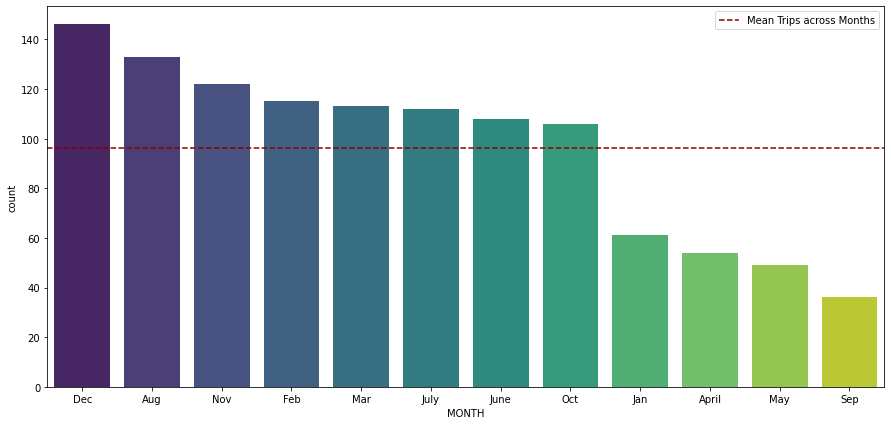

Dec      146
Aug      133
Nov      122
Feb      115
Mar      113
July     112
June     108
Oct      106
Jan       61
April     54
May       49
Sep       36
Name: MONTH, dtype: int64

In [115]:
plt.figure(figsize=(15,7))
sns.countplot(df['MONTH'], order=df['MONTH'].value_counts().index, palette='viridis')
plt.axhline(df['MONTH'].value_counts().mean(),linestyle='--', color = 'darkred', label='Mean Trips across Months')
plt.legend()
plt.show()
df['MONTH'].value_counts()

**Frequency of trip in December is highest whereas it is lowest in September.**

### Count of cab riders based on Minutes and Miles

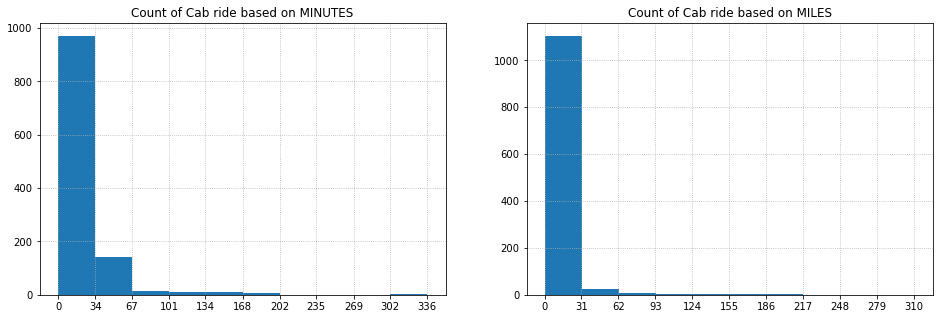

In [116]:
plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
n, bins, patches = plt.hist(df.MINUTES)
plt.xticks(bins.round())
plt.grid(True, linestyle = "dotted")
plt.title("Count of Cab ride based on MINUTES")

plt.subplot(1,2,2)
n, bins, patches = plt.hist(df.MILES)
plt.xticks(bins.round())
plt.grid(True, linestyle = "dotted")
plt.title("Count of Cab ride based on MILES");

#### Most of the cab rides are within a distance of 31 miles taking about 34 minutes.

### Let us see the distribution of cab rides based on Category

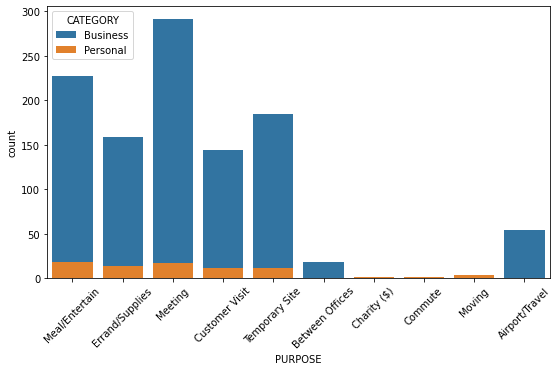

In [117]:
plt.figure(figsize = (9,5))
sns.countplot(data=df,x="PURPOSE", hue = 'CATEGORY', dodge = False)
plt.xticks(rotation = 45);

**The above plot makes clear distinction on the Purpose of Business rides and Personal rides. This may give insight to cab aggregators to decide which sector to introduce new cabs in.**

### Where do customers most frequently take cabs

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: START, dtype: int64

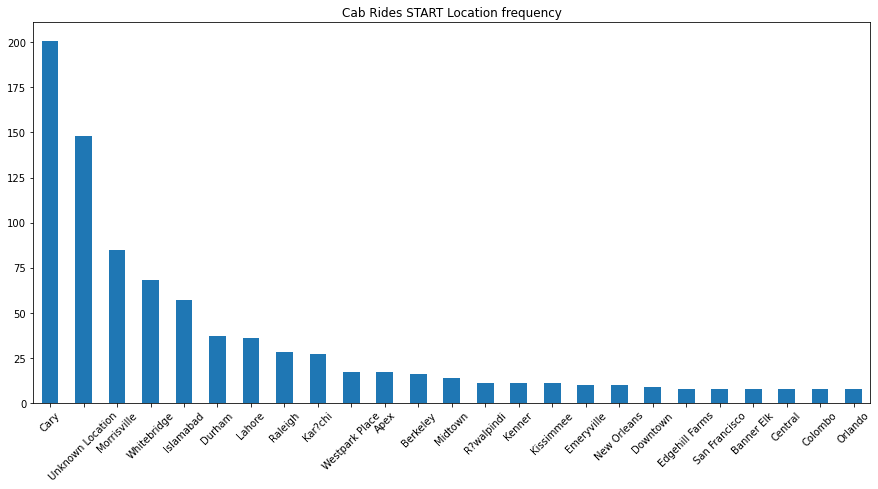

In [118]:
plt.figure(figsize = (15,7))
pd.Series(df['START']).value_counts()[:25].plot(kind="bar")
plt.title("Cab Rides START Location frequency")
plt.xticks(rotation = 45);
df['START'].value_counts()[:10]

### Frequency of Cab Rides STOP

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Lahore               36
Durham               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: STOP, dtype: int64

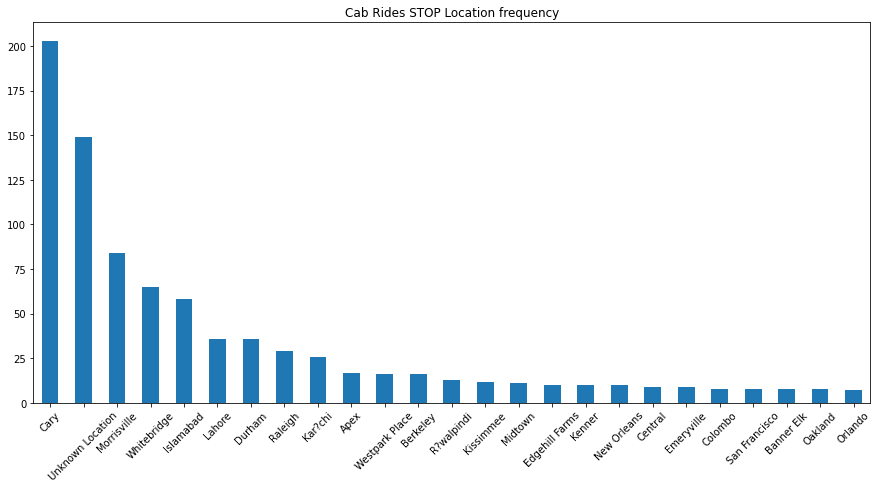

In [119]:
plt.figure(figsize=(15,7))
pd.Series(df['STOP']).value_counts()[:25].plot(kind = "bar")
plt.title("Cab Rides STOP Location frequency")
plt.xticks(rotation = 45);
df['STOP'].value_counts()[:10]

### How many miles was earned per category and purpose ?

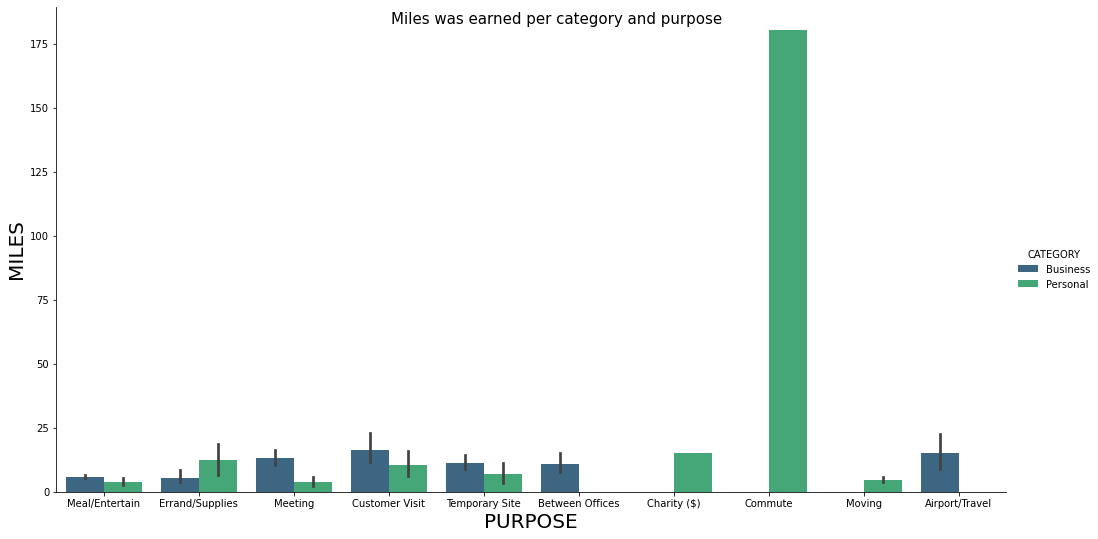

In [120]:
g = sns.factorplot(x="PURPOSE", y="MILES", hue="CATEGORY", data=df,
                   size=14, kind="bar", palette="viridis")
g.fig.suptitle('Miles was earned per category and purpose', fontsize= 15)
g.fig.set_size_inches(15, 7)
g.set_xlabels('PURPOSE', fontsize= 20)
g.set_ylabels('MILES', fontsize= 20)

### Conclusion

> - Most of the cab rides are within a distance of 31 miles taking about 34 minutes.
> - Business Cab rides are not only more in volume, but also in distance travelled.
> - Main uses of cab rides are Meal/Entertainment, Customer visit, Meeting, Errand/Supplies.
> - Cab traffic is mostly concentrated in 5 cities or localities.
> - Ac seasonal pattern of cab ride volume exists, which is highest on December.